# Revisions

## Main text

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.spatial.distance
import scipy.ndimage.filters
import copy
from matplotlib import animation
%matplotlib inline
import matplotlib as mpl
from pylab import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import font_manager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
import matplotlib.font_manager as fm


font_dir = ['../data/fonts/helvetica']
for font in fm.findSystemFonts(font_dir):
    fm.fontManager.addfont(font)
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
#print(font_names)

# Edit the font, font size, and axes width
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 2

out_dir = "../figures_paper/"

In [3]:
def potential(x, F):
    return 0.005*(x-5)**2*(x-20)**2 + F*x


def makarovp(xpoints, ypoints, a=1, b=0, barrier=1, d=0, s=0, l=11, w=1, vy=0.3, cy=1, Fx=0):
    xx, yy = np.meshgrid(xpoints,ypoints,sparse=True)
    potential = -np.log(np.exp(-(((a*yy-cy)**2-barrier)**2 + 0.5*(xx-s-yy)**2)) + b*np.exp(-(w*xx-l)**2-(yy-vy)**2/0.5)) + Fx*xx + d*yy
    return potential #- potential.min()


def slip_rate_nm(force, k1s_0, xd, kbT = 2.494339):
    force_kJ = force*(0.60241)
    rate = k1s_0*np.exp(xd*force_kJ/kbT)
    tau = 1/rate
    return(rate, tau)


def slip_rate(force, k1s_0, xd, kbT = 0.596161):
    force_kcal = force*0.0143929254
    rate = k1s_0*np.exp(xd*force_kcal/kbT)
    return rate

## Figure 1

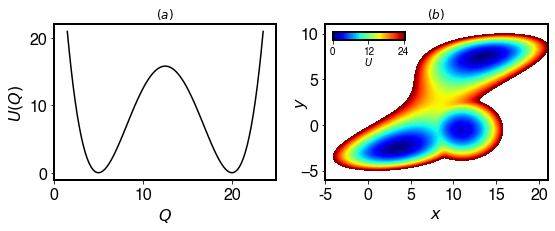

In [27]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import font_manager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

dist = np.linspace(1.5,23.5,100)
U = potential(dist, 0)


test_x_points = np.linspace(-5,21,100)
test_y_points = np.linspace(-5,10,75)
V = makarovp(test_x_points,test_y_points,a=0.4, b=0.2, barrier=4, d=0, s=6,l=11, w=1, vy=-0.5, cy=1, Fx=0)

fig, ax = plt.subplots(1,2, figsize=(8,3.5))
ax[0].plot(dist, U, c='k')
ax[0].set_xlabel(r'$Q$', fontweight='bold')
ax[0].set_ylabel(r'$U(Q)$', fontweight='bold')
ax[0].set_xlim(0,25)
#ax[0].tick_params(axis='both', labelsize=14)
ax[0].set_title(r"$(a)$", fontsize=12)
im1=ax[1].contourf(test_x_points,test_y_points, V, levels=np.linspace(0,24.5,100),cmap='jet')


ax[1].set_xlabel(r'$x$', fontweight='bold')
ax[1].set_ylabel(r'$y$', fontweight='bold', labelpad=-10)
ax[1].xaxis.set_major_locator(mpl.ticker.FixedLocator(np.linspace(-5, 20, 6)))
ax[1].set_xticklabels([int(i) for i in np.linspace(-5,20,6)])
ax[1].set_ylim(-6,11)      
ax[1].set_title(r"$(b)$", fontsize=12)
plt.tight_layout()
cbaxes = inset_axes(ax[1], width=1, height=.1,loc="upper left")
cbar = fig.colorbar(im1, cax=cbaxes, ticks = [0.,12,24], orientation='horizontal',)
cbar.ax.tick_params(labelsize=10) 
cbar.set_label(r'$U$', fontsize=10, labelpad=-1)
fig.savefig(f"{out_dir}figure1.pdf")
plt.show()
plt.close()

In [25]:
max(V.flatten())

245.5

## Figure 2

In [4]:
data = np.genfromtxt("../data/slipbond/Rates/rates_bars1.dat", dtype=float, comments='#') 
bell_params = np.genfromtxt("../data/slipbond/Rates/bell_params1.dat", dtype=float, comments='#') 
bell_dx = bell_params[0]
bell_k0 = np.exp(bell_params[1])
forces = data[:,0]
rates = data[:,1]
bars = data[:,3]

heightdat = np.genfromtxt("../data/slipbond/FES/barriervsH_fx.dat", dtype=float, comments='#') 
forces_h = heightdat[:,0]
height = heightdat[:,1]
dx_exp = heightdat[:,2]


dx_dat = np.genfromtxt("../data/slipbond/FES/double_well_analytical.dat", dtype=float, comments='#')
forces_dx = dx_dat[:,0]
height_dx = dx_dat[:,1]
dx_array = dx_dat[:,2]

infr_rates = rates
kb_T = 2.494339
ln_infr_rates = np.log(infr_rates)
en_height_dx_beta = np.array(height) #*bell_dx/kb_T
print(len(infr_rates), len(height), len(forces))
print(np.mean(dx_exp))
print(bell_dx, bell_k0, rates[-1], bars[-1])

21 21 21
6.047659714285714
6.856869460647772 21.89395694586019 18.306167 4.529602


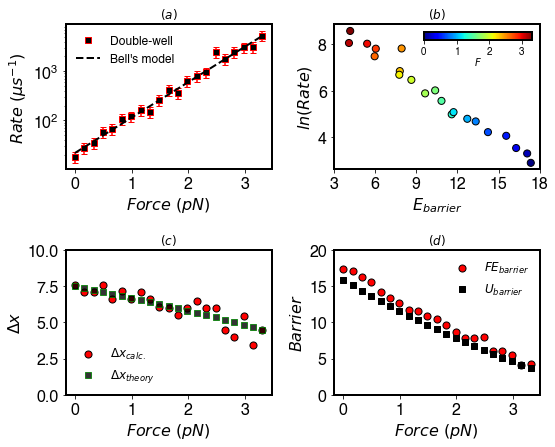

In [7]:
#plt.rcParams['font.size'] = 14
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 2

fig, ax = plt.subplots(2,2, figsize=(8,6.5))
ax[1,1].scatter(forces_h,height,c='r',edgecolors='k', label=r"$FE_{barrier}$",s=50)
ax[1,1].set_ylabel(r'$Barrier$', fontweight='bold', c='k')
ax[1,1].set_xlabel(r'$Force$', fontweight='bold')
ax[1,1].set_ylim(0,20)
ax[1,1].set_title(r"$(d)$", fontsize=12)
#ax2=ax[0,0].twinx()
ax[1,1].scatter(forces_dx, height_dx,c='k', marker='s',label=r"$U_{barrier}$",s=30)
#ax2.set_ylabel(r"$U_{barrier}$",c='k')
#ax2.set_ylim(0,20)
ax[1,1].legend(fontsize=12, loc='best', frameon=False)

lab = "%2.2f"%(bell_dx)
theo_x = np.linspace(0.0,np.max(forces),100)
theo_y = slip_rate_nm(theo_x, bell_k0, bell_dx)[0]
ax[0,0].plot(forces, rates, c='k',marker='s',label='Double-well', linestyle='', mec='r')
ax[0,0].errorbar(forces, rates, bars, c='r', linestyle='', capsize=3)
ax[0,0].plot(theo_x, theo_y,  c='k', linestyle='--', linewidth=2, label="Bell's model")
ax[0,0].set_ylabel(r"$Rate$")
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel(r"$Force$")
ax[0,0].set_title(r"$(a)$", fontsize=12)
ax[0,0].legend(fontsize=12, loc='best', frameon=False)
#ax[0,0].text(1.75,57,r"$\Delta x_{bell}=$"+lab, fontsize=12)
#ax[0,0].text(1.75,30,r"$k^{0}_{bell}=$"+f"{21.9}", fontsize=12)
#ax[0,0].text(1.75,13,r"$k^0=18.31\pm 4.53$", fontsize=12)

ax[1,0].scatter(forces_h, dx_exp,c='r', edgecolors='k', s=50, label=r"$\Delta x_{calc.}$")
ax[1,0].set_ylabel(r'$\Delta x$', fontweight='bold')
ax[1,0].set_xlabel(r'$Force$', fontweight='bold')
ax[1,0].set_ylim(0,10)
ax[1,0].scatter(forces_dx, dx_array,c='k', marker='s', edgecolors='g', s=30, alpha=0.8, label=r"$\Delta x_{theory}$")
ax[1,0].set_ylim(0,10)
ax[1,0].legend(fontsize=12, loc='lower left', frameon=False)
ax[1,0].set_title(r"$(c)$", fontsize=12)


ax[0,1].scatter(en_height_dx_beta,ln_infr_rates, c=forces, cmap='jet',edgecolors='k',s=50)
ax[0,1].set_ylabel(r'$ln(Rate)$', fontweight='bold')
ax[0,1].set_xlabel(r'$E_{barrier}$', fontweight='bold')
ax[0,1].set_title(r"$(b)$", fontsize=12)
#ax[0,1].text(3.2,3,f"$\Delta x={lab}$", fontsize=12)
xticks = np.linspace(3,18,6)
ax[0,1].set_xticks(xticks)
cmap = plt.get_cmap("jet")
norm = plt.Normalize(min(forces), max(forces))
sm =  ScalarMappable(norm=norm, cmap=cmap)
#sm.set_array([])    

plt.tight_layout()
cbaxes = inset_axes(ax[0,1], width=1.5, height="5%")
cbar = fig.colorbar(sm, cax=cbaxes, ticks = [0.,1,2,3], orientation='horizontal')
cbar.ax.tick_params(labelsize=10) 
cbar.set_label(r'$F$', fontsize=10, labelpad=-1)
fig.savefig(f"{out_dir}figure2.pdf")
plt.show()
plt.close()

## Figure 3 rev

In [4]:
from AnalysisMetad2 import catch_params

data = np.genfromtxt("../data/catchbond/Rates/rates_barsL11W.dat", dtype=float, comments='#') 
force_list = data[:,0]
rates_c =  data[:,1]


fvsHy = np.genfromtxt("../data/catchbond/FES/R2barrier_vs_force_y.dat", dtype=float, comments='#')
forces_hy = fvsHy[:,0]
height_y = fvsHy[:,1]


In [5]:
force_catch = data[:,0][1:]
rates_ca = data[:,1][1:]
catch = catch_params(force_catch, 1/rates_ca)
k1c_0 = catch[0]
x1c = catch[1]
k1s_0 = catch[2]
x1s = catch[3]
print(k1c_0, x1c, k1s_0, x1s)
#filedat = open("../data/catchbond/Rates/catch_paramsR2.dat", 'w')
#filedat.write("#%s\t%s\t%s\t%s\n"%("k1c_0","x1c","k1s_0", "x1s"))
#filedat.write("%f\t%f\t%f\t%f\n"%(k1c_0, x1c, k1s_0, x1s))
#filedat.close()

7.59189846338995 1.3852567682300139 0.2160367470345573 0.8026960433414774


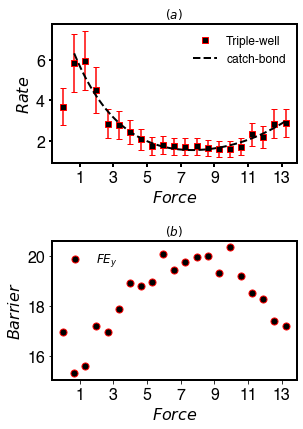

In [6]:
from AnalysisMetad2 import catch_rates_nm
%matplotlib inline
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 2
model_name = 'Triple-well'
fig, ax = plt.subplots(2,1, figsize=(4.5,6.25))
theo_x = np.linspace(0.66, np.max(force_list), 100)
theo_y = catch_rates_nm(k1c_0,-x1c,k1s_0, x1s, theo_x)[0]
lab = F"{model_name}"
r_stds = data[:,3]
ax[0].plot(force_list, rates_c, c='k',marker='s',label=lab, linestyle='', mec='r')
ax[0].errorbar(force_list, rates_c, r_stds, c='r', linestyle='', capsize=3)
ax[0].plot(theo_x, theo_y,  c='k', linestyle='--', linewidth=2, label="catch-bond")
ax[0].tick_params(axis='both', width=2)
ax[0].set_ylabel(r"$Rate$")
ax[0].set_xticks(np.linspace(1,13,7))
ax[0].set_xlabel(r"$Force$")
ax[0].legend(fontsize=12, frameon=False)
ax[0].set_title(r"$(a)$", fontsize=12)

#ax[1].scatter(forces_h[:-1],height_x[:-1],c='r',edgecolors='k', label=r"$FE_x$",s=50)
ax[1].scatter(forces_hy,height_y,c='k',edgecolors='r',label=r"$FE_y$", s=50)
#ax[1].tick_params(axis='both', width=2)
ax[1].set_ylabel(r"$Barrier$")
ax[1].set_xlabel(r"$Force$")
ax[1].set_xticks(np.linspace(1,13,7))
ax[1].legend(fontsize=12, frameon=False)
ax[1].set_title(r"$(b)$", fontsize=12)
fig.tight_layout()
fig.savefig(f"{out_dir}figure3rev.pdf")
plt.show()
plt.close()

## Fig 4 rev

In [7]:
work_dir = "../data/catchbond/FES/"
file_template = "catchbondR2_FES_prod_KJp__FORCE_/RUN/RUN_fes.dat"
fes = {}
for key in np.linspace(-8.0,0.0,21):
    k="%2.1f"%(key)
    file_name = file_template.replace('_FORCE_', k)
    runs = []
    for i in range(3,4):
        final = file_name.replace('RUN',str(i))
        temp = np.genfromtxt(work_dir+final, comments='#', dtype=float)                                             
        runs.append(temp)
    fes[k] = np.array(runs)

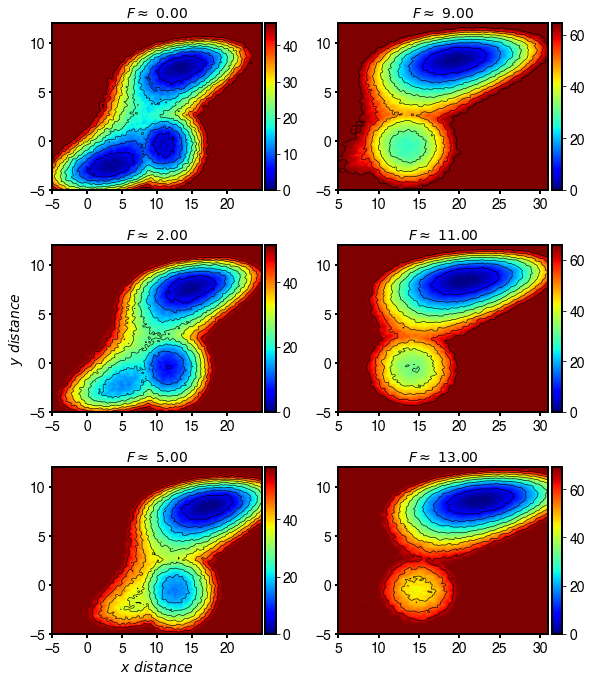

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.close('all')
g = ['0.0','-1.2','-3.2','-5.2','-6.4','-8.0']

fig, ax = plt.subplots(3,2,figsize=(8.5, 9.75))
i,j=0,0
k,l=0,1
for f in g:
    runfes = fes[f][0]
    x = runfes[:,0]
    y = runfes[:,1]
    z = runfes[:,2]
    X = np.linspace(np.min(x), np.max(x), 301)
    Y = np.linspace(np.min(y), np.max(y), 301)
    XZ = z.reshape(301,301)
    title = np.absolute(float(f))*(1.66)
    ax[i][j].contour(X, Y, XZ, 9, colors='black', linewidths=0.6)
    im=ax[i][j].imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
    ax[i][j].set_title(r"$F\approx\ %.2f$"%(round(title)), size=14)
   # ax[i][j].set_xlabel(r'$x\ distance$', size=16)
   # ax[i][j].set_ylabel(r'$y\ distance$', size=16)
    if float(f)*-1 > 3.2:
        ax[i][j].set_xlim(5,31.0)
        ax[i][j].set_xticks([i for i in np.arange(5,31.0,5.0)])
    else:
        ax[i][j].set_xlim(-5.0,25.0)
        ax[i][j].set_xticks([i for i in np.arange(-5,25.0,5.0)])
    ax[i][j].tick_params(axis='both', labelsize=14, width=2)
    divider = make_axes_locatable(ax[i,j])
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(im, ax=ax[i, j], cax=cax2)
    cbar.ax.tick_params(labelsize=14)
    if i < 2:
        i = i + 1
    elif i >= 2 and j == 0:
        j = j+1
        i = 0
        
ax[2][0].set_xlabel(r'$x\ distance$', size=14)
ax[1][0].set_ylabel(r'$y\ distance$', size=14)   
#fig.suptitle("Catchbond", fontsize=22)
fig.tight_layout()
#fig.subplots_adjust(top=.93)
plt.savefig(F'{out_dir}figure4rev.pdf')
plt.show()
plt.close()

## Figure 6

In [12]:
workdir = "../data/cavity_ligand_free/FES/"

fesr = {}
for i in np.arange(-50.0,2.0,2.0):
    if round(i,3) == -0.0:
        key = "0.0"
    else:
        key = str(round(i,3))
    fesr[key]=[]

file_template = "DIR_norestfes_pN_FORCE.fes2.dat"
for k in fesr:
    file_name = file_template.replace('FORCE', k)
    for i in range(2,3):
        final_name = file_name.replace('DIR', str(i))
        #print(final_name)
        dist = np.genfromtxt(workdir+final_name, comments='#', dtype=float)
        fesr[k].append(dist)

fesdz = {}
for i in np.arange(-50.0,2.0,2.0):
    if round(i,3) == -0.0:
        key = "0.0"
    else:
        key = str(round(i,3))
    fesdz[key]=[]

file_template = "DIR_norestfes_pN_FORCE.dz3.dat"
for k in fesdz:
    file_name = file_template.replace('FORCE', k)
    for i in range(2,3):
        final_name = file_name.replace('DIR', str(i))
        #print(final_name)
        dist = np.genfromtxt(workdir+final_name, comments='#', dtype=float)
        fesdz[k].append(dist)


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
for key in fesr:
    runs=fesr[key]
    for i,run in enumerate(runs):
        fig, ax = plt.subplots(figsize=(6, 5))
        z = run[:,2]
        x = run[:,0]
        y = run[:,1]
        index=np.where((z>23))[0]
        z[index]=23
        X = np.linspace(np.min(x),np.max(x), 501)
        Y = np.linspace(np.min(y), np.max(y), 551)
        XZ = z.reshape(551,501)
        ax.contour(X, Y, XZ, 9, colors='black', linewidths=0.6)
        im=ax.imshow(XZ,aspect='auto', origin='lower', interpolation='none', cmap='jet', extent = ( x.min(), x.max(), y.min(), y.max()))
        ax.set_title(r"$FES:\ %.2f\ pN$"%(np.absolute(float(key))), size=14)
        ax.set_xlabel(r'$Z-Distance\ (A)$', size=14)
        ax.set_ylabel(r'${\rho}-Distance$', size=14)
        ax.set_xlim(8.0, 17.0)
        ax.tick_params(axis='both', labelsize=14, width=2)
        divider = make_axes_locatable(fig.gca())
        cax = divider.append_axes("right", "5%", pad="3%")
        cbar=plt.colorbar(im, cax=cax)
        cbar.set_label(r"$FE\ ({\frac{kcal}{mol}})$", size=14)
        plt.tick_params(axis='both', labelsize=14, width=2)
        plt.tight_layout()
        plt.savefig("../figures/cavity_ligand_free/FES/ZandRhodistancevsFES.png")
        plt.show()

In [ ]:
from matplotlib import cm
viridis = cm.get_cmap('jet', 26)
newcolors = viridis(np.linspace(0,1,26))
markers = ['s','s','s','o','o','o','>','>','>']
fig,ax = plt.subplots(figsize=(6, 5))
for i,key in enumerate(fesdz):
    run=fesdz[key][0]
    ax.plot(run[:,0], run[:,1],label=F"F={np.abs(float(key))} pN", color=newcolors[i])
    
ax.set_ylabel(r'$FE\ (kcal/mol)$',  size=14)
ax.set_xlabel(r'$Z-Distance\ (\AA)$',  size=14)
ax.set_xlim(7.3,18)
ax.tick_params(axis='both', labelsize=14, width=2)
plt.legend(fontsize=9, ncol=2, loc = 'center right', bbox_to_anchor=(1.6, 0.5))
plt.savefig(F'../figures/cavity_ligand_free/FES/distance-z_FES_force.png')
plt.show()       

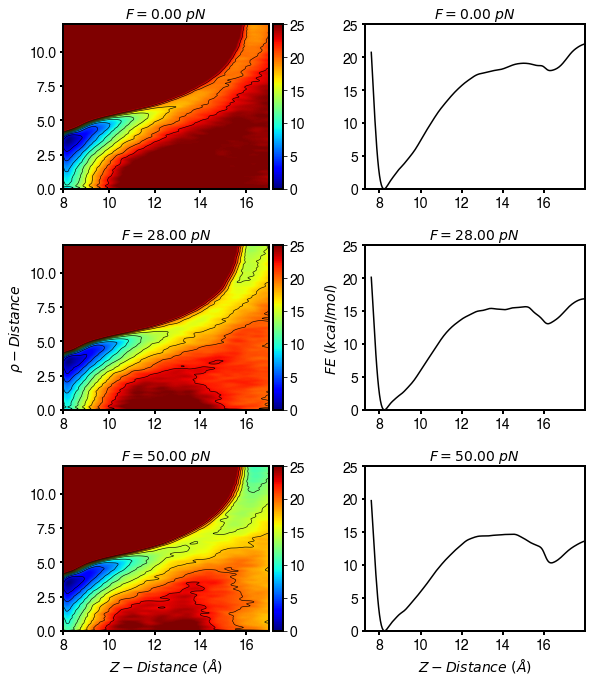

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
g = ['0.0','-28.0','-50.0']
fig, ax = plt.subplots(3,2,figsize=(8.5, 9.75))
i,j=0,0
k,l=0,1
for f in g:
    runfes = fesr[f][0]
    runz = fesdz[f][0]
    x = runfes[:,0]
    y = runfes[:,1]
    z = runfes[:,2]
    index=np.where((z>25))[0]
    z[index]=25
    X = np.linspace(np.min(x),np.max(x), 501)
    Y = np.linspace(np.min(y), np.max(y), 551)
    XZ = z.reshape(551,501)
    ax[i][j].contour(X, Y, XZ, 9, colors='black', linewidths=0.6)
    im=ax[i][j].imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
    ax[i][j].set_title(r"$F=%.2f\ pN$"%(np.absolute(float(f))), fontsize=14)
    #ax[i][j].set_xlabel(r'$Z-Distance\ (\AA)$')
    #ax[i][j].set_ylabel(r'${\rho}-Distance$')
    ax[i][j].set_xlim(8.0,17.0)
    ax[i][j].set_xticks([i for i in np.arange(8.0,17.0,2.0)])
    ax[i][j].tick_params(axis='both', labelsize=14, width=2)
    divider = make_axes_locatable(ax[i,j])
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(im, ax=ax[i, j], cax=cax2)
    cbar.ax.tick_params(labelsize=14)
    i=i+1
    ax[k,l].plot(runz[:,0], runz[:,1], color='k')
    ax[k,l].set_title(r"$F=%.2f\ pN\ $"%(np.absolute(float(f))), fontsize=14)
    #ax[k,l].set_ylabel(r"$FE\ (kcal/mol)$")
    #ax[k,l].set_xlabel(r'$Z-Distance\ (\AA)$')
    ax[k,l].set_xlim(7.3,18)
    ax[k,l].set_ylim(0.0,25)
    ax[k,l].set_xticks([i for i in np.arange(8.0,17.0,2.0)])
    ax[k,l].tick_params(axis='both',labelsize=14, width=2)
    k=k+1
ax[2][0].set_xlabel(r'$Z-Distance\ (\AA)$',size =14)
ax[2][1].set_xlabel(r'$Z-Distance\ (\AA)$' ,size =14)
ax[1][0].set_ylabel(r'${\rho}-Distance$',size =14)
ax[1,1].set_ylabel(r"$FE\ (kcal/mol)$",size =14)
#fig.suptitle("Free Ligand in Rigid Cavity", fontsize=22)
fig.tight_layout()
#fig.subplots_adjust(top=.93)
plt.savefig(f"{out_dir}figure6.pdf",)
plt.show()

## Figure 7

In [14]:
data = np.genfromtxt("../data/cavity_ligand_free/Rates/Rigid_Free_rates_bars.dat", dtype=float, comments='#') 
bell_params = np.genfromtxt("../data/cavity_ligand_free/Rates/Rigid_Free_dx.dat", dtype=float, comments='#') 
bell_dx = bell_params[0]
bell_k0 = np.exp(bell_params[1])
forces = data[:,0]
rates = data[:,1]
bars = data[:,3]

heightdat = np.genfromtxt("../data/cavity_ligand_free/FES/Rigid_Free_Ebarrier_dx_min.dat", dtype=float, comments='#') 
forces_h = heightdat[:,0]
height = heightdat[:,1]
dx_exp = heightdat[:,2]-heightdat[:,3]


kb_T = 0.59616
ln_infr_rates = np.log(rates)
en_height_dx_beta = np.array(height)#*bell_dx/kb_T
print(len(ln_infr_rates), len(height), len(forces))

print(np.mean(dx_exp))
print(bell_dx, bell_k0, rates[-1], bars[-1])

26 26 26
6.444025641320512
6.3130319419419365 0.0010553510077100734 0.000686 0.000169


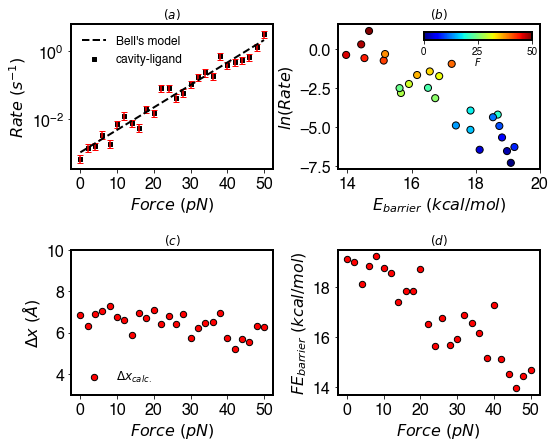

In [15]:
#plt.rcParams['font.size'] = 14
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 2

fig, ax = plt.subplots(2,2, figsize=(8,6.5))
ax[1,1].scatter(forces_h,height,c='r',edgecolors='k',s=40)
ax[1,1].set_ylabel(r'$FE_{barrier}\ (kcal/mol)$', fontweight='bold')
ax[1,1].set_xlabel(r'$Force\ (pN)$', fontweight='bold')
ax[1,1].set_xticks(np.linspace(0,50,6))
ax[1,1].set_title(r"$(d)$",fontsize=12)


theo_x = np.linspace(0.0,np.max(forces),100)
theo_y = slip_rate(theo_x, bell_k0, bell_dx)
ax[0,0].errorbar(forces, rates, bars, c='r', linestyle='', capsize=3)
ax[0,0].scatter(forces, rates, c='k',marker='s',label='cavity-ligand', s=10)
ax[0,0].plot(theo_x, theo_y,  c='k', linestyle='--', linewidth=2, label="Bell's model")
ax[0,0].set_ylabel(r"$Rate\ (s^{-1})$")
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel(r"$Force\ (pN)$")
ax[0,0].set_xticks(np.linspace(0,50,6))
ax[0,0].set_title(r"$(a)$",fontsize=12)
ax[0,0].legend(fontsize=12, loc='best', frameon=False)


ax[1,0].scatter(forces_h, dx_exp,c='r', edgecolors='k', s=40, label=r"$\Delta x_{calc.}$")
ax[1,0].set_ylabel(r'$\Delta x\ (\AA)$', fontweight='bold')
ax[1,0].set_xlabel(r'$Force\ (pN)$', fontweight='bold')
#ax[1,0].scatter(forces_dx, dx_array,c='k', marker='s', edgecolors='g', s=30, alpha=0.8, label=r"$\Delta x_{theory}$")
ax[1,0].legend(fontsize=12, loc='lower left', frameon=False)
ax[1,0].set_title(r"$(c)$",fontsize=12)
ax[1,0].set_ylim(3,10)
ax[1,0].set_xticks(np.linspace(0,50,6))

lab = "%2.2f"%(bell_dx)
ax[0,1].scatter(en_height_dx_beta,ln_infr_rates, c=forces, cmap='jet', edgecolors='k',s=50)
ax[0,1].set_ylabel(r'$ln(Rate)$', fontweight='bold')
ax[0,1].set_xlabel(r'$E_{barrier}\ (kcal/mol)$', fontweight='bold')
ax[0,1].set_title(r"$(b)$",fontsize=12)
xticks = np.linspace(14,20,4)
ax[0,1].set_xticks(xticks)
cmap = plt.get_cmap("jet")
norm = plt.Normalize(min(forces), max(forces))
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

plt.tight_layout()
cbaxes = inset_axes(ax[0,1], width=1.5, height="5%")
cbar = fig.colorbar(sm, cax=cbaxes, ticks = [0.,25,50], orientation='horizontal')
cbar.ax.tick_params(labelsize=10)
cbar.set_label(r'$F$', fontsize=10, labelpad=-1)
fig.savefig(f"{out_dir}figure7.pdf")
plt.show()

## Figure 8

In [17]:
data = np.genfromtxt("../data/sabiotin/Rates/rates_bars1_15ps.dat", dtype=float, comments='#') 
bell_params = np.genfromtxt("../data/sabiotin/Rates/bell_params_15ps.dat", dtype=float, comments='#') 
bell_dx = bell_params[0]
bell_k0 = bell_params[1]
forces = data[:,0]
rates = data[:,1]
bars = data[:,2]

print(bell_k0, bell_dx)

42.990039 2.070603


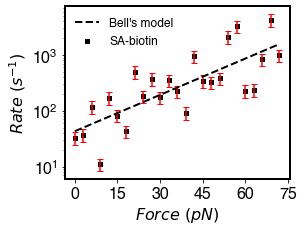

In [18]:
fig, ax = plt.subplots(1,1, figsize=(4.5,3.5))    
theo_x = np.linspace(0.0,np.max(forces),100)
theo_y = slip_rate(theo_x, bell_k0, bell_dx)
ax.errorbar(forces, rates, bars, c='r', linestyle='', capsize=3)
ax.scatter(forces, rates, c='k',marker='s',label='SA-biotin', s=10)
ax.plot(theo_x, theo_y,  c='k', linestyle='--', linewidth=2, label="Bell's model")
ax.set_ylabel(r"$Rate\ (s^{-1})$")
ax.set_yscale('log')
ax.set_xlabel(r"$Force\ (pN)$")
ax.set_xticks(np.linspace(0,75,6))
#ax.set_title(r"$(a)$",fontsize=12)
ax.legend(fontsize=12, loc='best', frameon=False)

plt.tight_layout()
fig.savefig(f"{out_dir}figure9rev.pdf")
plt.show()

In [26]:
keys = [str(k) for k in np.linspace(-15.0,0.0, 6)]
rc = {}
for k in keys:
    fes_rc = np.genfromtxt(f"../data/sabiotin/FES/fesvsforcerev2{k}.dat")
    rc[k] = fes_rc
ub = {}    
for k in keys:
    fes_ub = np.genfromtxt(f"../data/sabiotin/FES/fesvsforcerevub2{k}.dat")
    ub[k] = fes_ub
    

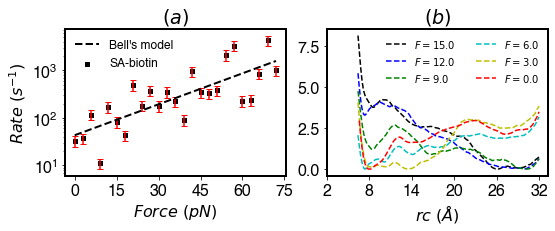

In [31]:
c=['k','b','g','c','y','r']
fig, ax = plt.subplots(1,2, figsize=(8,3.5))
ax[0].errorbar(forces, rates, bars, c='r', linestyle='', capsize=3)
ax[0].scatter(forces, rates, c='k',marker='s',label='SA-biotin', s=10)
ax[0].plot(theo_x, theo_y,  c='k', linestyle='--', linewidth=2, label="Bell's model")
ax[0].set_ylabel(r"$Rate\ (s^{-1})$")
ax[0].set_yscale('log')
ax[0].set_xlabel(r"$Force\ (pN)$")
ax[0].set_xticks(np.linspace(0,75,6))
ax[0].legend(fontsize=12, loc='best', frameon=False)
ax[0].set_title("$(a)$")

for i,k in enumerate(rc):
    fes=rc[k]
    ax[1].plot(fes[:,0][6:],fes[:,1][6:]-min(fes[:,1]),label=f"$F={np.abs(float(k))}$", linestyle='--', c=c[i])

ax[1].set_xlabel("$rc\ (\AA)$")
ax[1].set_xticks(np.linspace(2,32,6))
ax[1].legend(fontsize=10, frameon=False)
ax[1].set_title("$(b)$")
ax[1].legend(fontsize=10, loc='best', ncol=2, frameon=False)

plt.tight_layout()
#fig.savefig(f"{out_dir}figure9v2rev.pdf")
plt.show()

## Supplemental

## Figure 5 si

In [10]:
work_dir = "../data/catchbond/FES/"
file_template = "catchbondR2_FES_prod_KJp__FORCE_/RUN/RUN_fesy.dat"
fesy = {}
for key in np.linspace(-8.0,0.0,21):
    k="%2.1f"%(key)
    file_name = file_template.replace('_FORCE_', k)
    runs = []
    for i in range(3,4):
        final = file_name.replace('RUN',str(i))
        temp = np.genfromtxt(work_dir+final, comments='#', dtype=float)                                             
        runs.append(temp)
    fesy[k] = np.array(runs)
    
work_dir = "../data/catchbond/FES/"
file_template = "catchbondR2_FES_prod_KJp__FORCE_/RUN/RUN_fesx.dat"
fesx = {}
for key in np.linspace(-8.0,0.0,21):
    k="%2.1f"%(key)
    file_name = file_template.replace('_FORCE_', k)
    runs = []
    for i in range(3,4):
        final = file_name.replace('RUN',str(i))
        temp = np.genfromtxt(work_dir+final, comments='#', dtype=float)                                             
        runs.append(temp)
    fesx[k] = np.array(runs)

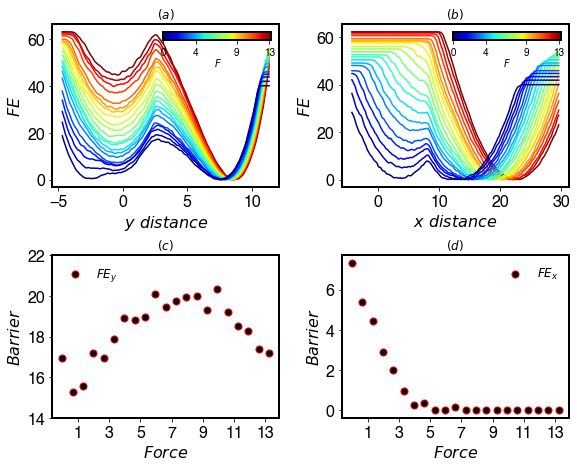

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import font_manager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.cm import ScalarMappable

fvsH = np.genfromtxt("../data/catchbond/FES/R2barrier_vs_force_x.dat", dtype=float, comments='#')
forces_h = fvsH[:,0]
height_x = fvsH[:,1]

fvsHy = np.genfromtxt("../data/catchbond/FES/R2barrier_vs_force_y.dat", dtype=float, comments='#')
forces_hy = fvsHy[:,0]
height_y = fvsHy[:,1]



forces = np.linspace(-8.0, 0.0 ,21) * -1 *(1.66)
cforces = np.round(np.linspace(-8.0, 0.0 ,4) * -1 *(1.66))
viridis = cm.get_cmap('jet', len(forces))
newcolors = viridis(np.linspace(0,1,len(forces)))
fig, ax = plt.subplots(2,2, figsize=(8.5,6.5))

index = len(newcolors) - 1
for i,k in enumerate(fesy):
    run = fesy[k][0]
    ax[0,0].plot(run[:,0][6:-12], run[:,1][6:-12], c=newcolors[index])
    index = index - 1

ax[0,0].set_xlabel(r'$y\ distance$', fontweight='bold')
ax[0,0].set_ylabel(r'$FE$', fontweight='bold')
ax[0,0].set_title(r"$(a)$", fontsize=12)

index = len(newcolors) - 1
for i,k in enumerate(fesx):
    run = fesx[k][0]
    ax[0,1].plot(run[:,0][6:-12], run[:,1][6:-12], c=newcolors[index])
    index = index - 1

ax[0,1].set_xlabel(r'$x\ distance$', fontweight='bold')
ax[0,1].set_ylabel(r'$FE$', fontweight='bold')
ax[0,1].set_title(r"$(b)$", fontsize=12)
fig.tight_layout()

cmap = plt.get_cmap("jet")
norm = plt.Normalize(min(forces), max(forces))
sm =  ScalarMappable(norm=norm, cmap=cmap)
cbaxes = inset_axes(ax[0,0], width=1.5, height="5%",loc="upper right")
cbar = fig.colorbar(sm, cax=cbaxes, ticks =cforces , orientation='horizontal')
cbar.ax.tick_params(labelsize=10) 
cbar.set_label(r'$F$', fontsize=10, labelpad=-1)

cmap = plt.get_cmap("jet")
norm = plt.Normalize(min(forces), max(forces))
sm =  ScalarMappable(norm=norm, cmap=cmap)
cbaxes = inset_axes(ax[0,1], width=1.5, height="5%",loc="upper right")
cbar = fig.colorbar(sm, cax=cbaxes, ticks =cforces , orientation='horizontal')
cbar.ax.tick_params(labelsize=10) 
cbar.set_label(r'$F$', fontsize=10, labelpad=-1)
#fig.savefig("./poster/FESvsforcepostercb.png")

ax[1,0].scatter(forces_hy,height_y,c='k',edgecolors='r',label=r"$FE_y$", s=50)
#ax[1,0].tick_params(axis='both', width=2)
ax[1,0].set_ylabel(r"$Barrier$")
ax[1,0].set_xlabel(r"$Force$")
ax[1,0].set_ylim(14,22)
ax[1,0].set_xticks(np.linspace(1,13,7))
ax[1,0].legend(fontsize=12, frameon=False, loc='upper left')
ax[1,0].set_title(r"$(c)$", fontsize=12)
#fig.tight_layout()
#fig.savefig(f"{out_dir}figure3R2.pdf")

ax[1,1].scatter(forces_h, height_x,c='k',edgecolors='r',label=r"$FE_x$", s=50)
#ax[1,0].tick_params(axis='both', width=2)
ax[1,1].set_ylabel(r"$Barrier$")
ax[1,1].set_xlabel(r"$Force$")
ax[1,1].set_xticks(np.linspace(1,13,7))
ax[1,1].legend(fontsize=12, frameon=False)
ax[1,1].set_title(r"$(d)$", fontsize=12)

fig.savefig(f"{out_dir}figure5si.pdf")
plt.show()


## Figure 6 si

In [33]:
from AnalysisMetad2 import catch_params
data = np.genfromtxt("../data/catchbond/Rates/rates_barsL11WR2.dat", dtype=float, comments='#') 
force_list = data[:,0]
rates_c =  data[:,1]

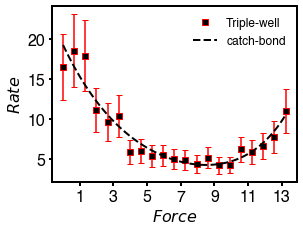

19.241688612008527 0.9542300058545066 0.06902109402489867 1.5305152530709651


In [34]:
from AnalysisMetad2 import catch_rates_nm
force_catch = data[:,0][:]
rates_ca = data[:,1][:]
catch = catch_params(force_catch, 1/rates_ca)
k1c_0 = catch[0]
x1c = catch[1]
k1s_0 = catch[2]
x1s = catch[3]


model_name = 'Triple-well'
fig, ax = plt.subplots(1,1, figsize=(4.5,3.5))
theo_x = np.linspace(force_catch[0], np.max(force_list), 100)
theo_y = catch_rates_nm(k1c_0,-x1c,k1s_0, x1s, theo_x)[0]
lab = F"{model_name}"
r_stds = data[:,3]
ax.plot(force_list, rates_c, c='k',marker='s',label=lab, linestyle='', mec='r')
ax.errorbar(force_list, rates_c, r_stds, c='r', linestyle='', capsize=3)
ax.plot(theo_x, theo_y,  c='k', linestyle='--', linewidth=2, label="catch-bond")
ax.tick_params(axis='both', width=2)
ax.set_ylabel(r"$Rate$")
ax.set_xticks(np.linspace(1,13,7))
ax.set_xlabel(r"$Force$")
ax.legend(fontsize=12, frameon=False)
#ax.set_title(r"$(a)$", fontsize=12)
fig.tight_layout()
fig.savefig(f"{out_dir}figure6si.pdf")
plt.show()

print(k1c_0, x1c, k1s_0, x1s)

## Figure 7 si

In [39]:
data = np.genfromtxt("../data/cavity_ligand_free/Rates/Rigid_Free_rates_bars.dat", dtype=float, comments='#') 
bell_params = np.genfromtxt("../data/cavity_ligand_free/Rates/Rigid_Free_dx.dat", dtype=float, comments='#') 
bell_dx = bell_params[0]
bell_k0 = np.exp(bell_params[1])
forces = data[:,0]
rates = data[:,1]
bars = data[:,3]

datab = np.genfromtxt("../data/cavity_ligand_free/Rates/RF15ps_rates_bars.dat", dtype=float, comments='#') 
bell_paramsb = np.genfromtxt("../data/cavity_ligand_free/Rates/RF15ps_dx.dat", dtype=float, comments='#') 
bell_dxb = bell_paramsb[0]
bell_k0b = np.exp(bell_paramsb[1])
forcesb = datab[:,0]
ratesb = datab[:,1]
barsb = datab[:,3]

datac = np.genfromtxt("../data/cavity_ligand_free/Rates/RF20ps_rates_bars.dat", dtype=float, comments='#') 
bell_paramsc = np.genfromtxt("../data/cavity_ligand_free/Rates/RF20ps_dx.dat", dtype=float, comments='#') 
bell_dxc = bell_paramsc[0]
bell_k0c = np.exp(bell_paramsc[1])
forcesc = datac[:,0]
ratesc = datac[:,1]
barsc = datac[:,3]

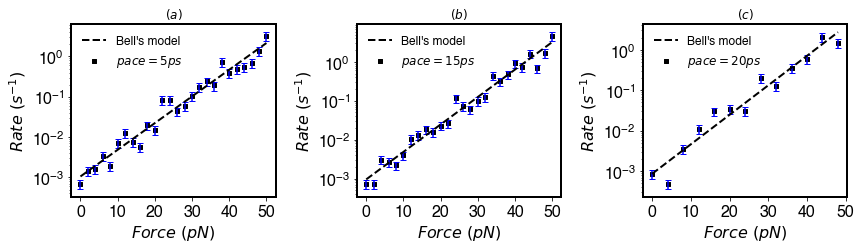

10ps: 6.3130319419419365, 0.0010553510077100734, 0.000686
15ps: 6.728818016375501, 0.0009560563597763234, 0.000719
20ps: 6.9536969024315525, 0.0008619322674215649, 0.000841


In [60]:
fig, ax = plt.subplots(1,3, figsize=(12.25,3.75))

theo_x = np.linspace(0.0,np.max(forces),100)
theo_y = slip_rate(theo_x, bell_k0, bell_dx)
ax[0].errorbar(forces, rates, bars, c='b', linestyle='', capsize=3)
ax[0].scatter(forces, rates, c='k',marker='s',label='$pace=5ps$', s=10)
ax[0].plot(theo_x, theo_y,  c='k', linestyle='--', linewidth=2, label="Bell's model")
ax[0].set_ylabel(r"$Rate\ (s^{-1})$")
ax[0].set_yscale('log')
ax[0].set_xlabel(r"$Force\ (pN)$")
ax[0].set_xticks(np.linspace(0,50,6))
ax[0].legend(fontsize=12, loc='best', frameon=False)
ax[0].set_title("$(a)$", fontsize=12)

theo_x = np.linspace(0.0,np.max(forcesb),100)
theo_y = slip_rate(theo_x, bell_k0b, bell_dxb)
ax[1].errorbar(forcesb, ratesb, barsb, c='b', linestyle='', capsize=3)
ax[1].scatter(forcesb, ratesb, c='k',marker='s',label='$pace=15ps$', s=10)
ax[1].plot(theo_x, theo_y,  c='k', linestyle='--', linewidth=2, label="Bell's model")
ax[1].set_ylabel(r"$Rate\ (s^{-1})$")
ax[1].set_yscale('log')
ax[1].set_xlabel(r"$Force\ (pN)$")
ax[1].set_xticks(np.linspace(0,50,6))
ax[1].legend(fontsize=12, loc='best', frameon=False)
ax[1].set_title("$(b)$", fontsize=12)

theo_x = np.linspace(0.0,np.max(forcesc),100)
theo_y = slip_rate(theo_x, bell_k0c, bell_dxc)
ax[2].errorbar(forcesc, ratesc, barsc, c='b', linestyle='', capsize=3)
ax[2].scatter(forcesc, ratesc, c='k',marker='s',label='$pace=20ps$', s=10)
ax[2].plot(theo_x, theo_y,  c='k', linestyle='--', linewidth=2, label="Bell's model")
ax[2].set_ylabel(r"$Rate\ (s^{-1})$")
ax[2].set_yscale('log')
ax[2].set_xlabel(r"$Force\ (pN)$")
ax[2].set_xticks(np.linspace(0,50,6))
ax[2].legend(fontsize=12, loc='best', frameon=False)
ax[2].set_title("$(c)$", fontsize=12)

plt.tight_layout()
plt.savefig(f"{out_dir}figure7si.pdf")
plt.show()

print(f"10ps: {bell_dx}, {bell_k0}, {rates[-1]}")
print(f"15ps: {bell_dxb}, {bell_k0b}, {ratesb[-1]}")
print(f"20ps: {bell_dxc}, {bell_k0c}, {ratesc[-1]}")

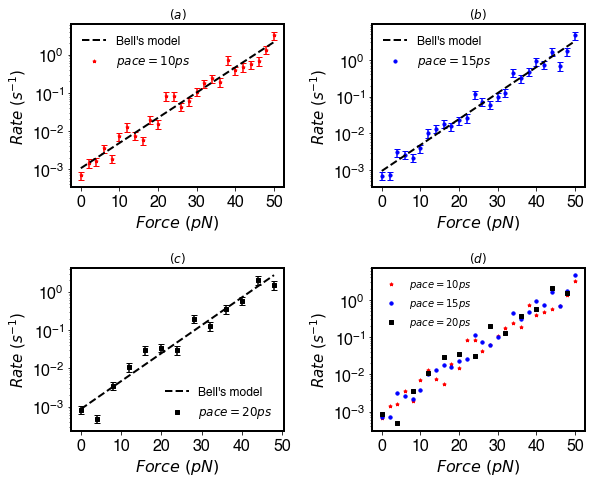

In [59]:
fig, ax = plt.subplots(2,2, figsize=(8.5,7))

theo_x = np.linspace(0.0,np.max(forces),100)
theo_y = slip_rate(theo_x, bell_k0, bell_dx)
ax[0,0].errorbar(forces, rates, bars, c='r', linestyle='', capsize=3)
ax[0,0].scatter(forces, rates, c='r',marker='*',label='$pace=10ps$', s=10)
ax[0,0].plot(theo_x, theo_y,  c='k', linestyle='--', linewidth=2, label="Bell's model")
ax[0,0].set_ylabel(r"$Rate\ (s^{-1})$",fontsize=15)
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel(r"$Force\ (pN)$")
ax[0,0].set_xticks(np.linspace(0,50,6))
ax[0,0].legend(fontsize=12, loc='best', frameon=False)
ax[0,0].set_title("$(a)$", fontsize=12)

theo_x = np.linspace(0.0,np.max(forcesb),100)
theo_y = slip_rate(theo_x, bell_k0b, bell_dxb)
ax[0,1].errorbar(forcesb, ratesb, barsb, c='b', linestyle='', capsize=3)
ax[0,1].scatter(forcesb, ratesb, c='b',marker='o',label='$pace=15ps$', s=10)
ax[0,1].plot(theo_x, theo_y,  c='k', linestyle='--', linewidth=2, label="Bell's model")
ax[0,1].set_ylabel(r"$Rate\ (s^{-1})$",fontsize=15)
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel(r"$Force\ (pN)$")
ax[0,1].set_xticks(np.linspace(0,50,6))
ax[0,1].legend(fontsize=12, loc='best', frameon=False)
ax[0,1].set_title("$(b)$", fontsize=12)

theo_x = np.linspace(0.0,np.max(forcesc),100)
theo_y = slip_rate(theo_x, bell_k0c, bell_dxc)
ax[1,0].errorbar(forcesc, ratesc, barsc, c='k', linestyle='', capsize=3)
ax[1,0].scatter(forcesc, ratesc, c='k',marker='s',label='$pace=20ps$', s=10)
ax[1,0].plot(theo_x, theo_y,  c='k', linestyle='--', linewidth=2, label="Bell's model")
ax[1,0].set_ylabel(r"$Rate\ (s^{-1})$",fontsize=15)
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel(r"$Force\ (pN)$")
ax[1,0].set_xticks(np.linspace(0,50,6))
ax[1,0].legend(fontsize=12, loc='best', frameon=False)
ax[1,0].set_title("$(c)$", fontsize=12)


ax[1,1].scatter(forces, rates, c='r',marker='*',label='$pace=10ps$', s=11)
ax[1,1].scatter(forcesb, ratesb, c='b',marker='o',label='$pace=15ps$', s=11)
ax[1,1].scatter(forcesc, ratesc, c='k',marker='s',label='$pace=20ps$', s=11)
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel(r"$Force\ (pN)$")
ax[1,1].set_ylabel(r"$Rate\ (s^{-1})$",fontsize=15)
ax[1,1].set_xticks(np.linspace(0,50,6))
ax[1,1].legend(fontsize=10, loc='upper left', frameon=False)
ax[1,1].set_title("$(d)$", fontsize=12)
plt.tight_layout()
plt.savefig(f"{out_dir}figure7v2si.pdf")
plt.show()

## Figure 8 si

In [4]:
keys = [str(k) for k in np.linspace(-72.0,0.0, 5)]
rc = {}
for k in keys:
    fes_rc = np.genfromtxt(f"../data/sabiotin/FES/fesvsforcerev2e{k}.dat")
    rc[k] = fes_rc
ub = {}    
for k in keys:
    fes_ub = np.genfromtxt(f"../data/sabiotin/FES/fesvsforcerevub2e{k}.dat")
    ub[k] = fes_ub
    

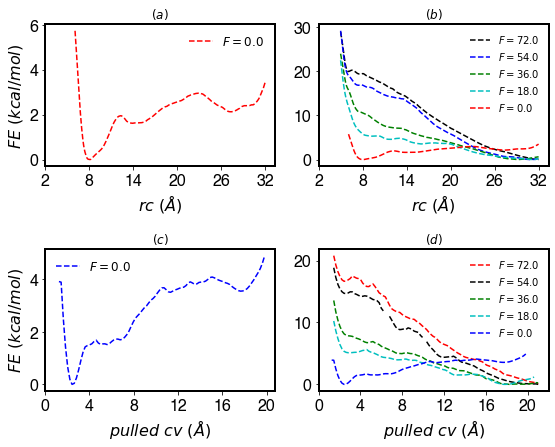

In [47]:
c=['k','b','g','c','r']
c2=['r','k','g','c','b']

fig, ax = plt.subplots(2,2, figsize=(8,6.5))
ax[0,0].errorbar(ub_all[1::2],final[1::2],errors[1::2], linewidth=0.5, linestyle='', c=newcolors[j], alpha=0.5, capsize=1)
ax[0,0].plot(rc['0.0'][:,0],rc['0.0'][:,1]-min(rc['0.0'][:,1]),label="$F=0.0$", linestyle='--', c = 'r')
ax[0,0].set_title("$(a)$", fontsize=12)
for i,k in enumerate(rc):
    fes=rc[k]
    ax[0,1].plot(fes[:,0],fes[:,1]-min(fes[:,1]),label=f"$F={np.abs(float(k))}$", linestyle='--',c=c[i])
ax[0,0].legend(fontsize=12, frameon=False)
ax[0,0].set_ylabel("$FE\ (kcal/mol)$")
ax[0,0].set_xlabel("$rc\ (\AA)$")
ax[0,1].set_xlabel("$rc\ (\AA)$")
ax[0,0].set_xticks(np.linspace(2,32,6))
ax[0,1].set_xticks(np.linspace(2,32,6))
ax[0,1].legend(fontsize=10, frameon=False)
ax[0,1].set_title("$(b)$", fontsize=12)

ax[1,0].plot(ub['0.0'][:,0],ub['0.0'][:,1]-min(ub['0.0'][:,1]),label="$F=0.0$",linestyle='--', c = c2[i])
for i,k in enumerate(ub):
    fes=ub[k]
    ax[1,1].plot(fes[:,0][:],fes[:,1][:]-min(fes[:,1]),label=f"$F={np.abs(float(k))}$",linestyle='--', c=c2[i])
ax[1,0].legend(fontsize=12, frameon=False)
ax[1,0].set_ylabel("$FE\ (kcal/mol)$")
ax[1,0].set_xlabel("$pulled\ cv\ (\AA)$")
ax[1,0].set_title("$(c)$", fontsize=12)
ax[1,1].set_xlabel("$pulled\ cv\ (\AA)$")
ax[1,0].set_xticks(np.linspace(0,20,6))
ax[1,1].set_xticks(np.linspace(0,20,6))
ax[1,1].legend(fontsize=10, frameon=False)
ax[1,1].set_title("$(d)$", fontsize=12)
fig.tight_layout()
#fig.savefig(f"{out_dir}/figure8si.pdf")
plt.show()

## Figure 9 si

In [26]:
keys = [k for k in np.linspace(0.0,15.0, 6)]
rc = {}
for k in keys:
    if k==0:
        k=-0.0
    fes_rc = np.genfromtxt(f"../data/sabiotin/FES/fesvsforcerev2e{-1*k}.dat")
    rc[k] = fes_rc
ub = {}    
for k in keys:
    if k==0:
        k=-0.0
    fes_ub = np.genfromtxt(f"../data/sabiotin/FES/fesvsforcerevub2e{-1*k}.dat")
    ub[k] = fes_ub

0.0
0.0
0.0
0.0
0.0
0.0


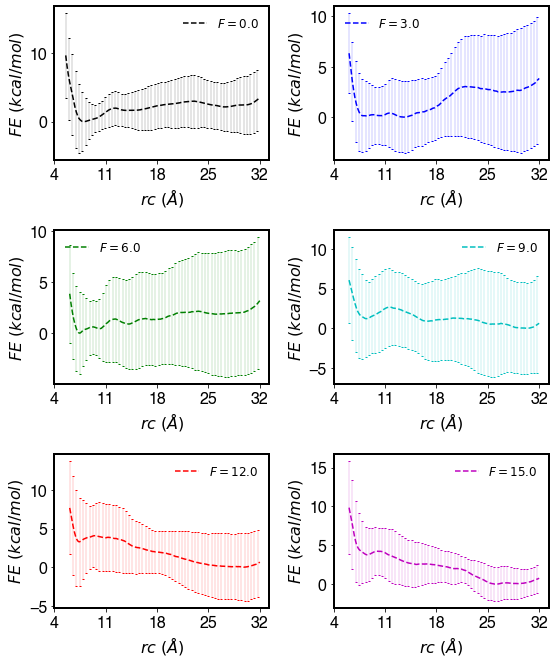

In [40]:
c=['k','b','g','c','r','m']
c2=['r','k','g','c','b','m']

fig, ax = plt.subplots(3,2, figsize=(8,9.5))
index=0
for i in range(3):
    for j in range(2):
        k=keys[index]
        fes=rc[k]
        print(min(fes[:,1]))
        ax[i,j].errorbar(fes[:,0][6::5],fes[:,1][6::5]-min(fes[:,1]),fes[:,2][6::5],linestyle='', c=c[index], linewidth=0.2, capsize=1)
        ax[i,j].errorbar(fes[:,0][6:],fes[:,1][6:]-min(fes[:,1]),label=f"$F={np.abs(float(k))}$",linestyle='--', c=c[index])
        ax[i,j].legend(frameon=False, fontsize=12)
        ax[i,j].set_ylabel("$FE\ (kcal/mol)$")
        ax[i,j].set_xlabel("$rc\ (\AA)$")
        ax[i,j].set_xticks(np.linspace(4,32,5))
        #ax[i,j].set_yticks(np.linspace(-2,10,4))
        index = index+1
        
fig.tight_layout()
fig.savefig(f"{out_dir}/figure9si.pdf")
plt.show()
plt.close()


In [72]:
data = np.genfromtxt("../data/cavity_ligand_free/Rates/Rigid_Free_taus_bars.dat", dtype=float, comments='#') 
data2 = np.genfromtxt("../data/cavity_ligand_free/Rates/avg_tau.dat", dtype=float, comments='#') 
forces = data[:,0]
ftaus = data[:,1]
forces2 = data2[:,0]
avg_t = data2[:,1]
sab = np.genfromtxt("../data/sabiotin/Rates/ftaus_15ps.dat", dtype=float, comments='#') 
fsab = sab[:,0]
ftausab = sab[:,1]
sab2 = np.genfromtxt("../data/sabiotin/Rates/avgtaus_15ps.dat", dtype=float, comments='#')
fsab2 = sab2[:,0]
ftausab2 = sab2[:,1]

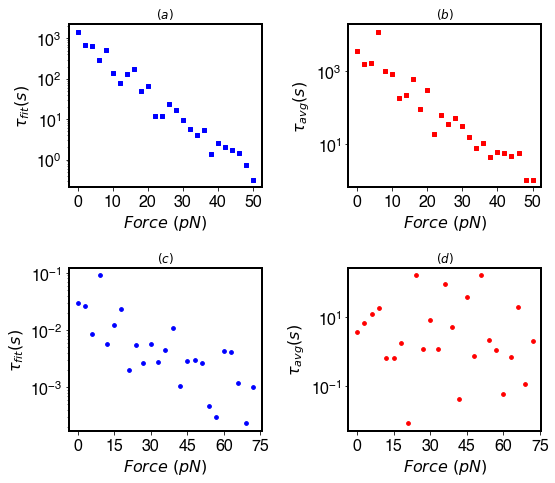

In [75]:
fig, ax = plt.subplots(2,2, figsize=(8,7))


ax[0,0].scatter(forces, ftaus, c='b',marker='s', s=14)
ax[0,0].set_ylabel(r"$\tau_{fit} (s)$")
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel(r"$Force\ (pN)$")
ax[0,0].set_xticks(np.linspace(0,50,6))
ax[0,0].set_title("$(a)$", fontsize=12)

ax[0,1].scatter(forces2, avg_t, c='r',marker='s', s=14)
ax[0,1].set_ylabel(r"$\tau_{avg} (s)$")
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel(r"$Force\ (pN)$")
ax[0,1].set_xticks(np.linspace(0,50,6))
ax[0,1].set_title("$(b)$", fontsize=12)

ax[1,0].scatter(fsab, ftausab, c='b',marker='o', s=14)
ax[1,0].set_ylabel(r"$\tau_{fit} (s)$")
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel(r"$Force\ (pN)$")
ax[1,0].set_xticks(np.linspace(0,75,6))
ax[1,0].set_title("$(c)$", fontsize=12)


ax[1,1].scatter(fsab2, ftausab2, c='r',marker='o', s=14)
ax[1,1].set_ylabel(r"$\tau_{avg} (s)$")
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel(r"$Force\ (pN)$")
ax[1,1].set_xticks(np.linspace(0,75,6))
ax[1,1].set_title("$(d)$", fontsize=12)

fig.tight_layout()
fig.savefig(f"{out_dir}/figure10si.pdf")
plt.show()